# Mapeos Discretos

## 1. Mapeo Logístico

https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/

In [3]:
def logistic(r,x):
    return r*x*(1 - x)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

[-1.0, 0.33333333333333337, 0.6, 0.7142857142857143]


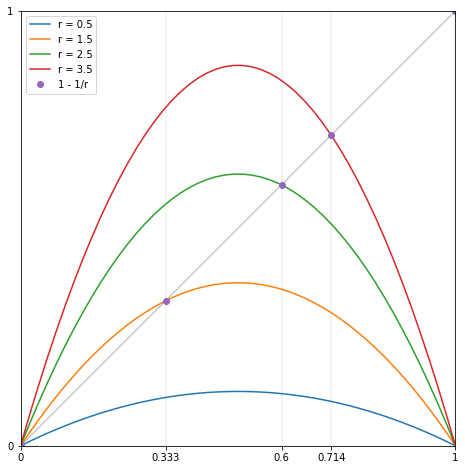

In [81]:
x = np.linspace(0,1)
plt.figure(figsize=(8,8))
a = []
for i in range(4):
    plt.plot( x, logistic(i+0.5,x), label=f'r = {i+0.5:.1f}' )
    a.append(1 - 1/(i+0.5))
print(a)
a[0] = 0
a.append(1)
plt.plot(x,x,'k',lw=0.3)
plt.plot(a,a,'o',label='1 - 1/r')
plt.axis('scaled')
plt.xticks(a,[0,0.333,0.6,0.714,1])
plt.yticks([0,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.grid(lw=0.3)

Los puntos fijos de $f(x) = rx(1-x)$ se encuentran en $0$ y $1 - \dfrac{1}{r}$ y son estables para $1<r<3$, así que hay bifurcaciones en $r=1$ y $r=3$

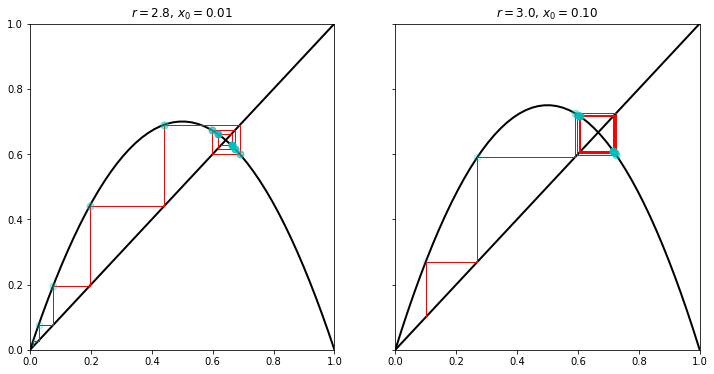

In [95]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the y=x diagonal line.
    t = np.linspace(0,1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'r', lw=1)
        ax.plot([x, y], [y, y], 'r', lw=1)
        # Plot the positions with increasing opacity.
        ax.plot([x], [y], 'oc', ms=7,
                alpha=(i+1)/n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.2f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plot_system(2.8, .01, 10, ax=ax1)
plot_system(3, .1, 10, ax=ax2)

Cambiando el valor inicial a $x_0 = 0.2$ 

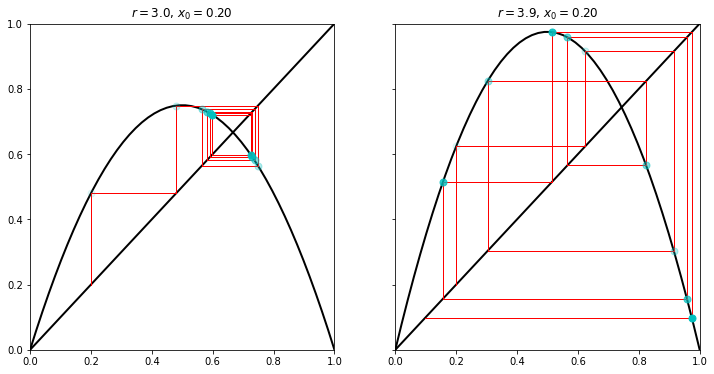

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
plot_system(3, .2, 10, ax=ax1)
plot_system(3.9, .2, 10, ax=ax2)

https://notebook.community/gboeing/pynamical/examples/pynamical-demo-cobweb-plots

In [108]:
from pynamical import cobweb_plot
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay, glob
from PIL import Image

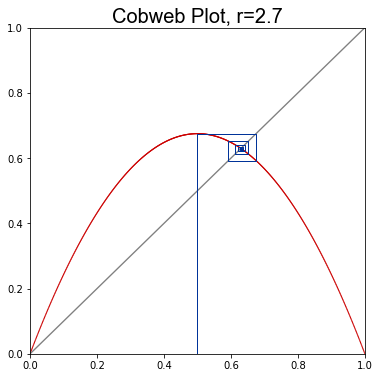

In [118]:
cobweb_plot(r=2.7,cobweb_x=0.5)

### Animación

In [140]:
# configure the animation: 70 rates between 0 and 3.999 plus 15 paused frames each at start and end
save_folder = 'images/cobweb-animate'
gif_filepath = 'images/animated-logistic-cobweb.gif'
start_r = 0
end_r = 3.99
steps = 140
rates = np.linspace(start_r, end_r, steps)

In [141]:
# create a plot for each growth rate
for n, r in enumerate(rates):
    filename = '{:03d}'.format(n)
    title = 'Logistic Map Cobweb Plot, r={:.2f}'.format(r)
    cobweb_plot(r=r, filename=filename, folder=save_folder, dpi=90, title=title, show=False)
    plt.close()

In [142]:
# create a tuple of display durations, one for each frame
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 10 #show all other frames for 10 ms
durations = tuple([first_last] + [standard_duration] * (len(rates) - 2) + [first_last])

In [143]:
# load all the static images into a list then save as an animated gif
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

In [144]:
IPdisplay.Image(url=gif_filepath)

### Diagrama de bifurcación

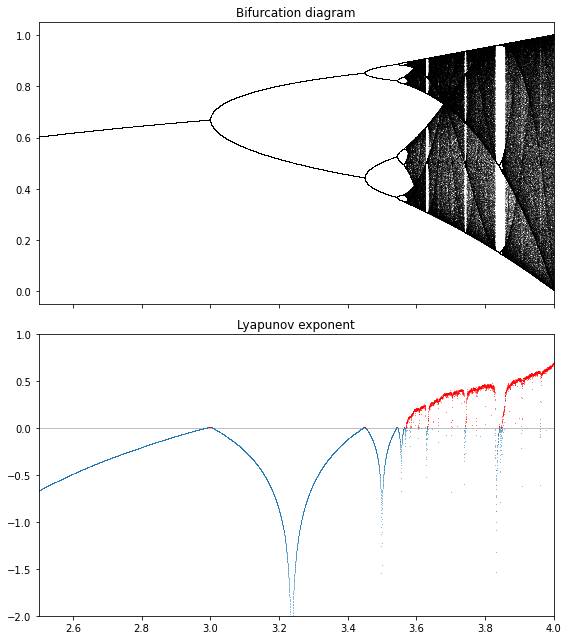

In [146]:
n = 10000
r = np.linspace(2.5, 4.0, n)

# We use 1000 iterations of the logistic map and keep the last 100 iterations to display the bifurcation diagram:

iterations = 1000
last = 100

# We initialize our system with the same initial condition x0=0.00001:

x = 1e-5 * np.ones(n)

# We also compute an approximation of the Lyapunov exponent for every value of r. The Lyapunov exponent is defined by:
#λ(r)=limn→∞1n∑i=0n−1log∣∣∣dfrdx(x(r)i)∣∣∣

# We first initialize the lyapunov vector:

lyapunov = np.zeros(n)

# Now, we simulate the system and plot the bifurcation diagram. The simulation only involves the iterative evaluation of the logistic() function on our vector x. Then, to display the bifurcation diagram, we draw one pixel per point x(r)n during the last 100 iterations:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         ',', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         ',r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

Si hacemos un zoom entre $x=3.63$ y $3.64$ y $f(x)$ entre $0.45$ y $0.55$, observamos que efectivamente el diagrama de bifurcación tiene una estructura fractal.

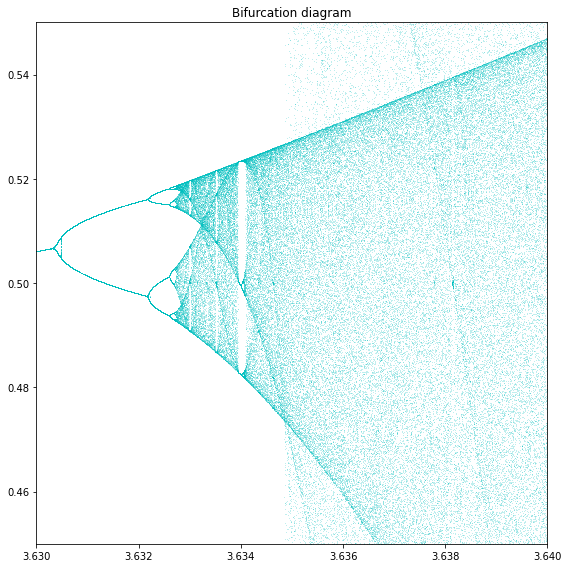

In [155]:
n = 10000
x0 = 3.63
xf = 3.64
r = np.linspace(x0,xf,n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

fig,ax1 = plt.subplots(1, 1, figsize=(8,8),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r - 2*r*x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',c', alpha=.25)
ax1.set_xlim(x0,xf)
ax1.set_ylim(0.45,0.55)
ax1.set_title("Bifurcation diagram")
plt.tight_layout()

Veamos otros detalles

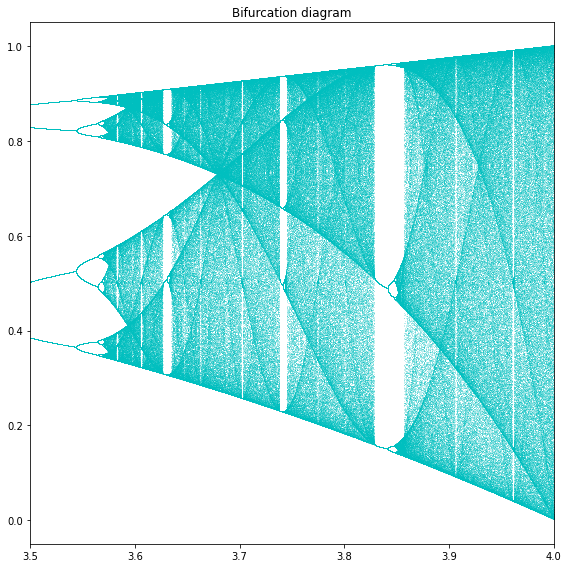

In [148]:
n = 10000
x0 = 3.5
xf = 4
r = np.linspace(x0,xf,n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

fig,ax1 = plt.subplots(1, 1, figsize=(8,8),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r - 2*r*x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',c', alpha=.25)
ax1.set_xlim(x0,xf)
ax1.set_title("Bifurcation diagram")
plt.tight_layout()

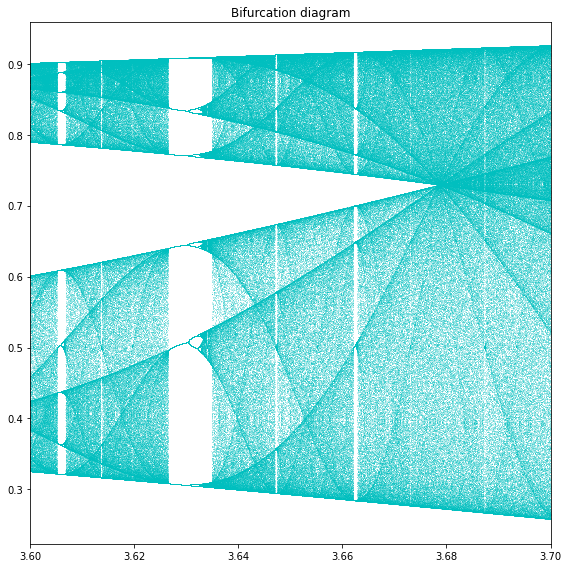

In [149]:
n = 10000
x0 = 3.6
xf = 3.7
r = np.linspace(x0,xf,n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

fig,ax1 = plt.subplots(1, 1, figsize=(8,8),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r - 2*r*x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',c', alpha=.25)
ax1.set_xlim(x0,xf)
ax1.set_title("Bifurcation diagram")
plt.tight_layout()

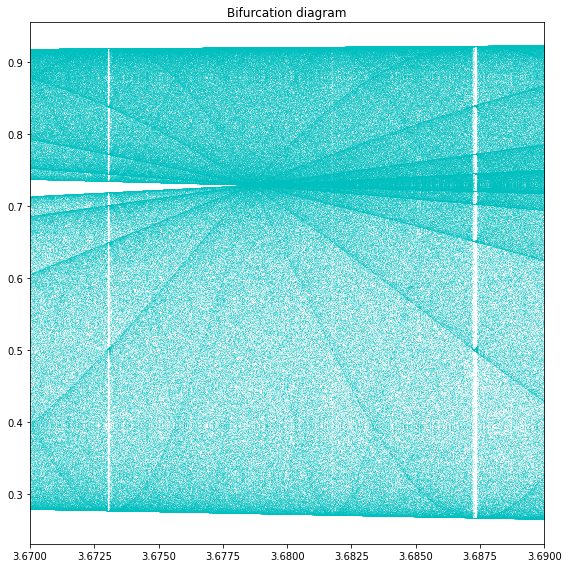

In [153]:
n = 10000
x0 = 3.67
xf = 3.69
r = np.linspace(x0,xf,n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

fig,ax1 = plt.subplots(1, 1, figsize=(8,8),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r - 2*r*x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',c', alpha=.25)
ax1.set_xlim(x0,xf)
ax1.set_title("Bifurcation diagram")
plt.tight_layout()

Veamos el mapeo completo

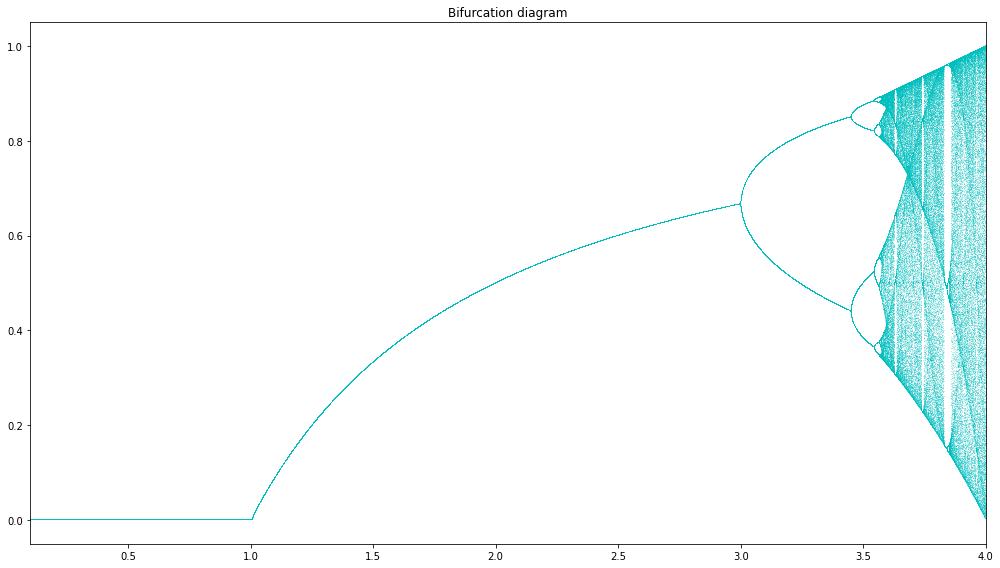

In [37]:
n = 10000
x0 = 0.1
xf = 4
r = np.linspace(x0,xf,n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

fig,ax1 = plt.subplots(1, 1, figsize=(14,8),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2*r*x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',c', alpha=.25)
ax1.set_xlim(x0,xf)
ax1.set_title("Bifurcation diagram")
plt.tight_layout()

$ $

## 2. Conjunto de Mandelbrot

https://levelup.gitconnected.com/mandelbrot-set-with-python-983e9fc47f56

El conjunto de Mandelbrot es el conjunto de valores de $c$ en el plano complejo para los cuales la órbita del punto crítico $z=0$ bajo la iteración del mapeo

$$z_{n+1} = z_n^2 + c$$

permanece acotada. Por lo tanto, un número complejo $c$ pertenece al conjunto de Mandelbrot si, empezando con $z_0 = 0$ y aplicando la iteración, el valor absoluto de $z_n$ permanece acotado para toda $n > 0$, donde esa cota es $2$.

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def get_iter(c:complex, thresh:int =4, max_steps:int=25) -> int:
    # Z_(n) = (Z_(n-1))^2 + c
    # Z_(0) = c
    z=c
    i=1
    while i<max_steps and (z*z.conjugate()).real<thresh:
        z = z*z + c
        i+=1
    return i

In [38]:
def plotter(n, thresh, max_steps=25):
    mx = 2.5 / (n-1)
    my = 2.25 / (n-1)
    mapper = lambda x,y: (mx*x - 2, my*y - 1.13)
    img=np.full((n,n), 255)
    for x in range(n):
        for y in range(n):
            it = get_iter(complex(*mapper(x,y)), thresh=thresh, max_steps=max_steps)
            img[y][x] = 255 - it
    return img

Código de colores `plasma`

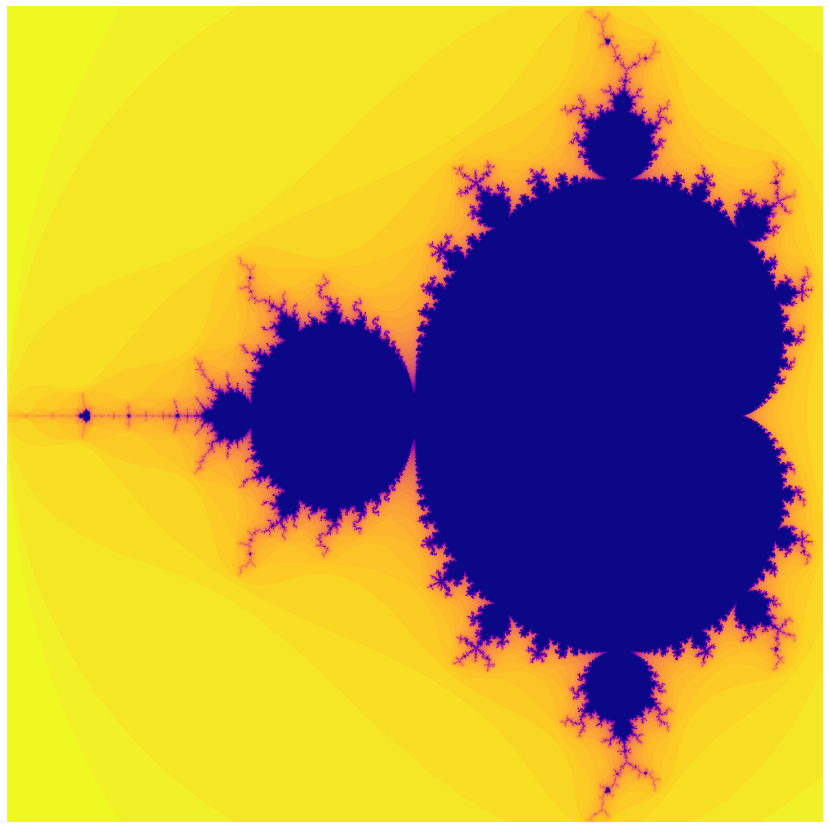

In [39]:
n=1000
img = plotter(n, thresh=4, max_steps=50)
plt.figure(figsize=(15,15))
plt.imshow(img, cmap="plasma")
plt.axis("off")
plt.show()

Código de colores `turbo`

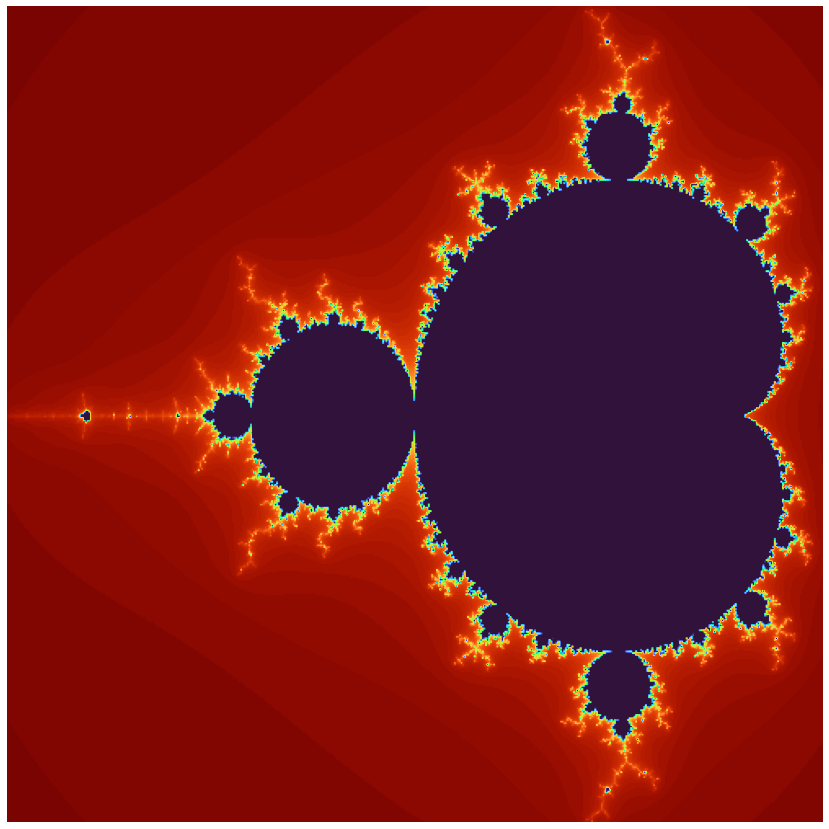

In [6]:
n=500
img = plotter(n, thresh=8, max_steps=100)
plt.figure(figsize=(15,15))
plt.imshow(img, cmap="turbo")
plt.axis("off")
plt.show()

## 3

La relación entre el mapeo logístico y el conjunto de Mandelbrot $M$ está dada por la intersección de $M$ con el eje real, la cual es el intervalo $[−2, 1/4]$. Los parámetros a lo largo de este intervalo se pueden poner en correspondencia uno a uno con aquellos de la familia logística real

$$x_{n+1}=rx_{n}(1-x_{n}),\quad r\in [1,4]$$

La correspondencia está dada por

$$z=r\left({\frac {1}{2}}-x\right),\quad c={\frac {r}{2}}\left(1-{\frac {r}{2}}\right)$$

De hecho, esto da una correspondencia entre el espacio de parámetros completo de la familia logística y la del conjunto de Mandelbrot.

<img src="Verhulst-Mandelbrot-Bifurcation.jpg" width="450px">
<img src="330px-Logistic_Map_Bifurcations_Underneath_Mandelbrot_Set.gif" width="450px">

## 4 La constante de Feigenbaum

La **constante de Feigenbaum** es la proporción entre cada intervalo de bifurcation y el siguiente entre cada dupliación de periodo, de un mapeo de 1 parámetro

$$x_{i+1}=f(x_{i})$$

donde $f(x)$ es una función parametrizada por el parámetro de bifurcación $a$.

Está dada por

$$\delta =\lim _{n\to \infty }{\frac {a_{n-1}-a_{n-2}}{a_{n}-a_{n-1}}}=4.669\,201\,609\,\ldots$$

donde $a_n$ son valores discretos de $a$ cuando se duplica el $n$-ésimo periodo.

En el caso del **mapeo logístico**:

$$\begin{array}{c|c|c|c}
n &	\text{Periodo} & \text{Parámetro de bifurcación } a_n & \text{Razón } \dfrac{a_{n-1}-a_{n-2}}{a_{n}-a_{n-1}} \\
\hline
1 & 2	& 3 & — \\
2 & 4	& 3.4494897 & — \\
3 & 8	& 3.5440903 & 4.7514 \\
4 & 16	& 3.5644073 & 4.6562 \\
5 & 32	& 3.5687594 & 4.6683 \\
6 & 64	& 3.5696916 & 4.6686 \\
7 & 128	& 3.5698913 & 4.6692 \\
8 & 256	& 3.5699340 & 4.6694 \\
\end{array}$$

En el caso del **conjunto de Mandelbrot**, la constante de Feigenbaum es la razón entre los diámetros de círculos sucesivos en el eje real del plano complejo (como se observa en la siguiente animación).

<img src="Mandelbrot_zoom.gif" width="250px">

$$\begin{array}{c|c|c|c}
n &	\text{Periodo} & \text{Parámetro de bifurcación } c_n & \text{Razón } \dfrac{c_{n-1}-c_{n-2}}{c_{n}-c_{n-1}} \\
\hline
1	& 2	& −0.75 & — \\
2	& 4	& −1.25 & — \\
3	& 8	& −1.3680989 & 4.2337 \\
4	& 16	& −1.3940462 & 4.5515 \\
5	& 32	& −1.3996312 & 4.6458 \\
6	& 64	& −1.4008287 & 4.6639 \\
7	& 128	& −1.4010853 & 4.6682 \\
8	& 256	& −1.4011402 & 4.6689 \\
9	& 512	& −1.401151982029	& \vdots \\
10	& 1024  & −1.401154502237	& \vdots \\
∞   &       & −1.4011551890\dots & \vdots \\
\end{array}$$

El parámetro de bifurcación $c_n$ converge al punto de Feigenbaum $c = −1.401155\dots$ y la razón converge a la constante de Feigenbaum.

Otros mapeos también reproducen esta razón, así que la constante de Feigenbaum en teoría de bifurcaciones es análoga a $π$ en geometría y a $e$ en cálculo.